In [1]:
import pytz
import os
import sqlite3
import re
import uproot
import IPython
import sys
import numpy as np
import pandas as pd
import pymap3d as pm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from pandasql import sqldf
from rnog_data.runtable import RunTable
from datetime import datetime, timedelta
from scipy.fft import fft
from scipy.signal import stft
from NuRadioReco.modules.io.RNO_G.readRNOGDataMattak import readRNOGData
from NuRadioReco.utilities import units
from Flight import Flight
from FlightTracker import FlightTracker

tracker = FlightTracker('2023-05-12 00:00:00')
tracker.flights_distinct

,index,flightnumber,date,filename,mintime,maxtime,min_r
0,0,THY8JK,2023-05-12,2023.05.13-051443.db,2023-05-12 07:05:09.600000,2023-05-12 07:11:06.400000,24.8
1,1,THY76Y,2023-05-12,2023.05.13-051443.db,2023-05-12 07:24:30.300000,2023-05-12 07:25:30.600000,148.1
2,2,THY8MT,2023-05-12,2023.05.13-051443.db,2023-05-12 11:12:41.800000,2023-05-12 11:18:43.600000,27.6
3,3,THY73G,2023-05-12,2023.05.13-051443.db,2023-05-12 11:19:18.800000,2023-05-12 11:25:15.500000,27.7
4,4,SAS931,2023-05-12,2023.05.13-051443.db,2023-05-12 11:19:43.900000,2023-05-12 11:25:15.500000,56.4
5,5,DAL143,2023-05-12,2023.05.13-051443.db,2023-05-12 11:57:24.900000,2023-05-12 11:58:25.200000,148.0
6,6,OCN72,2023-05-12,2023.05.13-051443.db,2023-05-12 12:40:07.300000,2023-05-12 12:46:14.100000,27.4
7,7,DLH456,2023-05-12,2023.05.13-051443.db,2023-05-12 13:06:20.000000,2023-05-12 13:11:56.600000,57.6
8,8,DAL179,2023-05-12,2023.05.13-051443.db,2023-05-12 13:17:18.200000,2023-05-12 13:23:25.000000,72.8
9,9,DLH490,2023-05-12,2023.05.13-051443.db,2023-05-12 13:37:34.100000,2023-05-12 13:43:50.900000,27.6


In [2]:
f = tracker.get_flight_by_index(6)
flight = f.header_df.reset_index(drop=True)
sqldf('Select count(*) as SumEvents, sum(cw), sum(impulsive) FROM flight')

INFO:runtable_database:database connection to RNOG_live established


,SumEvents,sum(cw),sum(impulsive)
0,117,16,16


In [4]:
a = np.zeros(24)
print(a.shape)
b = np.ones((5, 24))
b[0] = a
c = np.mean(b, axis=0)
c.size

(24,)


24

In [3]:
#f.header_df.head(50)
sqldf('Select * From flight Where cw = 1 and impulsive = 1 order by SNR_max desc')

,i,station_number,run_number,event_number,trigger_time,radiant_triggers,lt_triggers,force_triggers,l1_max,amp_max,SNR_max,cw,impulsive,noise
0,57,21,2730,1038,1.683895e+09,0,1,0,0.946352,0.147391,14.716656,1,1,0
1,58,21,2730,1039,1.683895e+09,0,1,0,0.940471,0.138206,14.223174,1,1,0
2,56,21,2730,1010,1.683895e+09,0,1,0,0.963961,0.152373,13.269178,1,1,0


INFO:NuRadioReco.readRNOGData:Set 0 selector(s)
INFO:NuRadioReco.readRNOGData:Parse through / read-in 1 directory(ies) / file(s).
ERROR:root:Could not find a directory for the calibration files.Was RNO_G_DATA or RNO_G_ROOT_DATA defined as a system env variable?
INFO:NuRadioReco.readRNOGData:555 events in 1 runs/datasets have been found using the uproot Mattak backend.


Using uproot backend
Found combined file


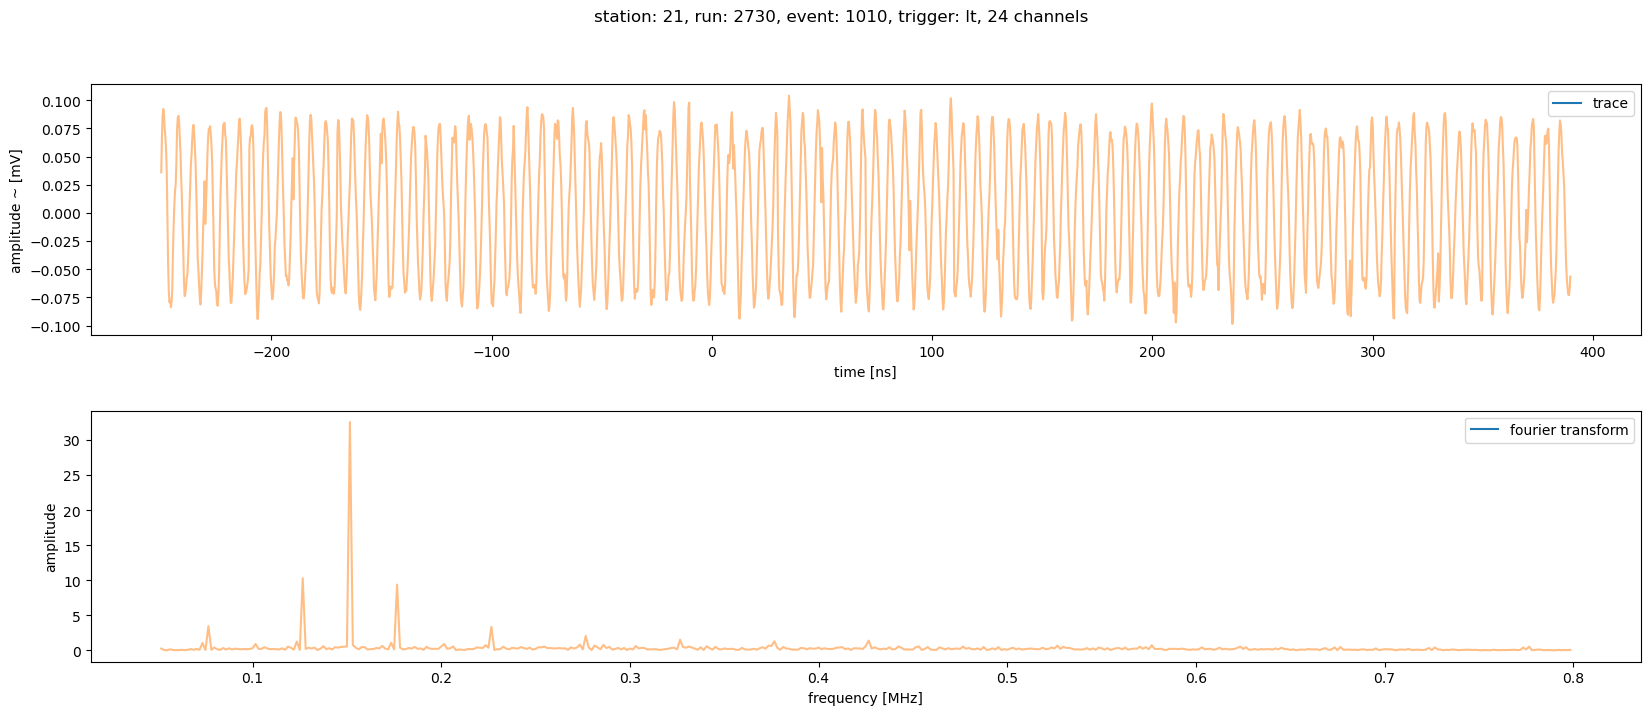

In [7]:
f.plot_event_by_id(56, channels= [7])

In [6]:
from NuRadioReco.modules.io.RNO_G.readRNOGDataMattak import readRNOGData
from NuRadioReco.utilities import units
reader = readRNOGData()

station_nr = 21
run_nr = 2730
reader.begin([f'/home/oliver/software/Flights/combined/station{station_nr}_run{run_nr}_combined.root'], overwrite_sampling_rate=3200*units.MHz)

event = reader.get_event(event_id = 1010, run_nr = run_nr)

# Establish a connection to the SQLite database
con = sqlite3.connect('./combined_scores/station21_run2730_combined_scores.db')

# get combined_scores from db file and join on temp_df
#avg_RMS = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", con)
avg_RMS = np.array(pd.read_sql_query("SELECT * FROM avg_RMS", con))[:, 1] # first column is the index that we don't want
print(avg_RMS)
# Close the database connection
con.close()

l1_max = 0
amp_max = 0
SNR_max = 0
#RMS_max = 0
station = event.get_station(station_nr)
for i in range(24):
    channel = station.get_channel(i)
    trace = channel.get_trace()
    times = channel.get_times()
    times_mask = (times < 0)

    freq = channel.get_frequencies()
    mask = (0.05 < freq) & (freq < 0.8) & (freq != 0.2)
    freq = freq[mask]
    spectrum = np.abs(channel.get_frequency_spectrum())[mask]

    #calculate
    l1 = Flight.simple_l1(spectrum)
    amp = np.max(np.abs(trace))
    #avg = np.average(trace)
    #RMS = np.sqrt(np.mean(trace[times_mask]**2))
    SNR = amp / avg_RMS[i]
    print()
    print('channel', i)
    print('amp', amp)
    print('SNR', SNR)
    print('avg_RMS', avg_RMS[i])

    #check
    #l1_max  = max(l1, l1_max)
    #SNR_max = max(SNR, SNR_max)
    #RMS_max = max(RMS, RMS_max)
    #amp_max = max(amp, amp_max)

INFO:NuRadioReco.readRNOGData:Set 0 selector(s)
INFO:NuRadioReco.readRNOGData:Parse through / read-in 1 directory(ies) / file(s).
ERROR:root:Could not find a directory for the calibration files.Was RNO_G_DATA or RNO_G_ROOT_DATA defined as a system env variable?
INFO:NuRadioReco.readRNOGData:555 events in 1 runs/datasets have been found using the uproot Mattak backend.


Using uproot backend
Found combined file
[0.00508221 0.00471669 0.00575452 0.00299618 0.00296226 0.00870131
 0.0075441  0.00784346 0.00516742 0.00879155 0.00544091 0.00709927
 0.01200902 0.02118866 0.00808439 0.01318999 0.02424096 0.01127097
 0.01398084 0.01873297 0.01178097 0.0059694  0.00625885 0.00237765]

channel 0
amp 0.05438977445041213
SNR 10.70198700761295
avg_RMS 0.00508221271542579

channel 1
amp 0.0318143921881909
SNR 6.745072700146293
avg_RMS 0.004716686328303159

channel 2
amp 0.044690944096869425
SNR 7.766236095183986
avg_RMS 0.005754517831949928

channel 3
amp 0.02564031191141632
SNR 8.557671179406194
avg_RMS 0.002996178676871699

channel 4
amp 0.012494179503841556
SNR 4.2177831339225955
avg_RMS 0.0029622621901429533

channel 5
amp 0.08267176956274615
SNR 9.501072955155868
avg_RMS 0.00870130878406563

channel 6
amp 0.08600445391895656
SNR 11.4002212763441
avg_RMS 0.007544103911159964

channel 7
amp 0.10407632027093622
SNR 13.269178373519507
avg_RMS 0.00784346380320239

c

In [5]:
t = tracker.flights_distinct.reset_index(drop=True)
temp_df = pd.DataFrame()


for i in range(len(t)):
    print(f'---------------------')
    print(f'start: {i + 1}/{len(t)}, {t.flightnumber.iloc[i]}')
    f = tracker.get_flight_by_index(i)
    flight = f.header_df.reset_index(drop=True)
    flight['fk_station_run_event'] = flight.station_number.astype(str) + '_' + flight.run_number.astype(str) + '_' + flight.event_number.astype(str)
    #print(flight.head(50))

    if len(flight) > 0:
        temp_df = pd.concat([temp_df, flight], ignore_index=True, sort=False)
    
    print(f'end: {i + 1}/{len(t)}')

print(len(temp_df))
temp_df.drop_duplicates(subset=['fk_station_run_event'], inplace=True)
print(len(temp_df))
#temp_df.head(50)

query = '''
    Select 
        flightnumber, 
        mintime, 
        maxtime, 
        --strftime('%Y-%m-%d %H:%M:%S.%f', datetime(temp_df.trigger_time, 'unixepoch')) as test_time, 
        count(*) as SumEvents, 
        round(count(*) / (JULIANDAY(t.maxtime) - JULIANDAY(t.mintime)) / 86400 * 10, 1) as EventsPer10Seconds,
        sum(cw), 
        sum(impulsive), 
        sum(lt_triggers), 
        sum(radiant_triggers), 
        sum(force_triggers) 
    From t
    Left Join temp_df
    On strftime('%Y-%m-%d %H:%M:%S.%f', datetime(temp_df.trigger_time, 'unixepoch')) >= t.mintime
    And strftime('%Y-%m-%d %H:%M:%S.%f', datetime(temp_df.trigger_time, 'unixepoch')) <= t.maxtime
    Group By flightnumber, maxtime, mintime
    order by mintime asc
    '''
t = sqldf(query)
clear_output(wait=True)
t


,flightnumber,mintime,maxtime,SumEvents,EventsPer10Seconds,sum(cw),sum(impulsive),sum(lt_triggers),sum(radiant_triggers),sum(force_triggers)
0,THY8JK,2023-05-12 07:05:09.600000,2023-05-12 07:11:06.400000,106,3.0,0,0,70,19,17
1,THY76Y,2023-05-12 07:24:30.300000,2023-05-12 07:25:30.600000,10,1.7,0,0,6,3,1
2,THY8MT,2023-05-12 11:12:41.800000,2023-05-12 11:18:43.600000,140,3.9,39,14,88,26,26
3,THY73G,2023-05-12 11:19:18.800000,2023-05-12 11:25:15.500000,96,2.7,42,14,53,23,20
4,SAS931,2023-05-12 11:19:43.900000,2023-05-12 11:25:15.500000,90,2.7,38,13,49,22,19
5,DAL143,2023-05-12 11:57:24.900000,2023-05-12 11:58:25.200000,14,2.3,0,0,10,0,4
6,OCN72,2023-05-12 12:40:07.300000,2023-05-12 12:46:14.100000,117,3.2,16,14,81,23,13
7,DLH456,2023-05-12 13:06:20.000000,2023-05-12 13:11:56.600000,107,3.2,0,11,71,20,16
8,DAL179,2023-05-12 13:17:18.200000,2023-05-12 13:23:25.000000,134,3.7,17,13,98,22,14
9,DLH490,2023-05-12 13:37:34.100000,2023-05-12 13:43:50.900000,127,3.4,5,11,94,21,12


In [16]:
sqldf('Select * FROM temp_df where force_triggers = 1 order by amp_max desc')

,index,station_number,run_number,event_number,trigger_time,radiant_triggers,lt_triggers,force_triggers,l1_max,amp_max,SNR_max,RMS_max,cw,impulsive,noise,fk_station_run_event
0,254,11,2218,1333,1.683907e+09,0,0,1,0.046142,0.142897,None,None,0,0,0,11_2218_1333
1,830,21,2731,3526,1.683904e+09,0,0,1,0.547928,0.140313,None,None,1,0,0,21_2731_3526
2,13,11,2216,3021,1.683897e+09,0,0,1,0.165400,0.118983,None,None,0,0,0,11_2216_3021
3,321,11,2218,2108,1.683908e+09,0,0,1,0.048810,0.113918,None,None,0,0,0,11_2218_2108
4,263,11,2218,1562,1.683907e+09,0,0,1,0.050880,0.113780,None,None,0,0,0,11_2218_1562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,13,21,2732,4670,1.683915e+09,0,0,1,0.023979,0.032304,None,None,0,0,0,21_2732_4670
445,691,21,2731,2325,1.683903e+09,0,0,1,0.025684,0.032206,None,None,0,0,0,21_2731_2325
446,1055,21,2731,5871,1.683905e+09,0,0,1,0.110583,0.031648,None,None,0,0,0,21_2731_5871
447,885,21,2731,4155,1.683904e+09,0,0,1,0.038137,0.031634,None,None,0,0,0,21_2731_4155


INFO:NuRadioReco.readRNOGData:Set 0 selector(s)
INFO:NuRadioReco.readRNOGData:Parse through / read-in 1 directory(ies) / file(s).
ERROR:root:Could not find a directory for the calibration files.Was RNO_G_DATA or RNO_G_ROOT_DATA defined as a system env variable?
INFO:NuRadioReco.readRNOGData:405 events in 1 runs/datasets have been found using the uproot Mattak backend.


Using uproot backend
Found combined file


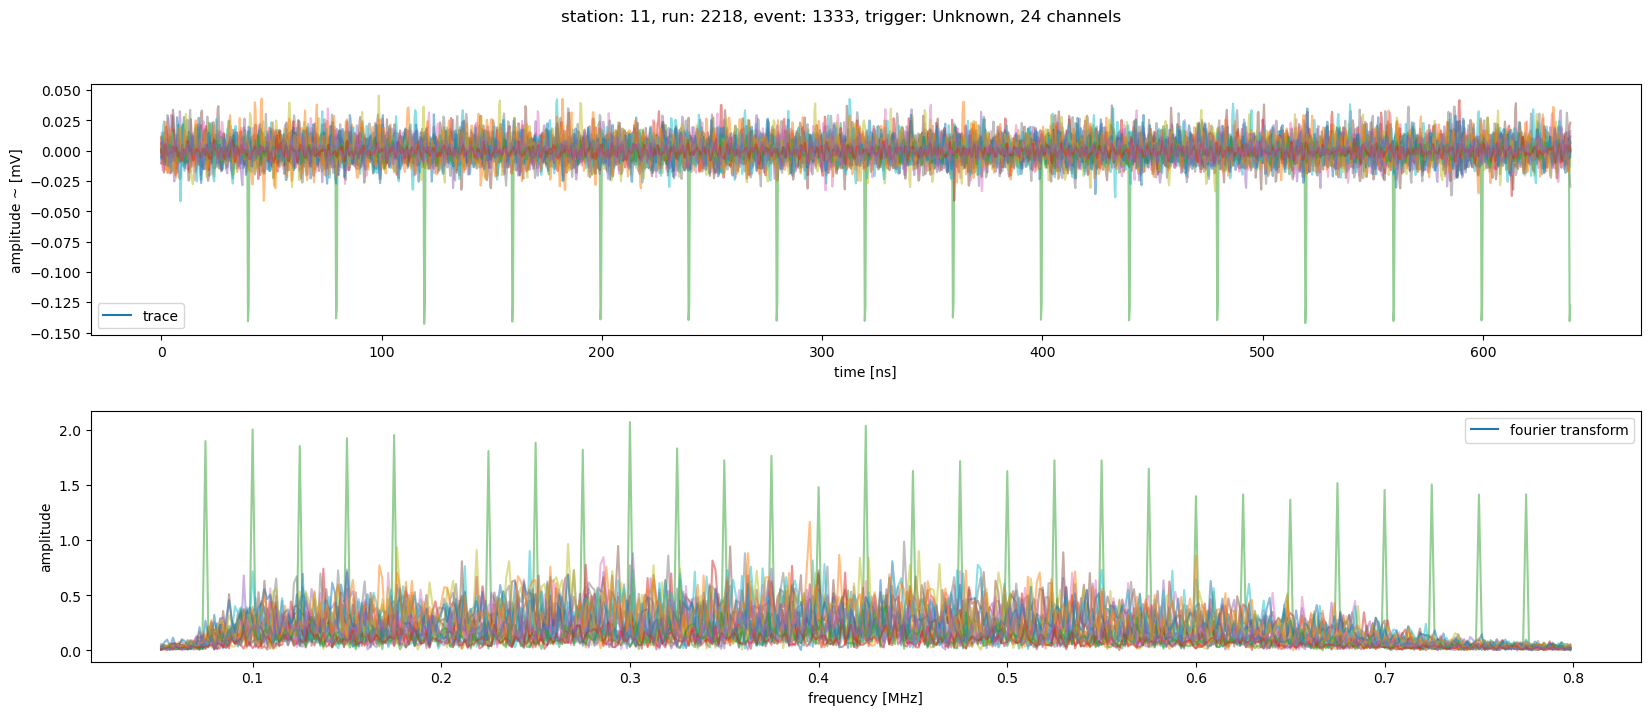

In [5]:
#Flight.plot_event_by_id(station_number = 11, run_number = 2216, event_number = 3021)
Flight.plot_event_by_id(station_number = 11, run_number = 2218, event_number = 1333)

In [7]:
pd.__version__

'2.1.4'

In [8]:
f1 = tracker.get_flight_by_index(6)
f1.header_df = Flight.get_what_ever_is_in_those_root_files(f1.start_time_plot, f1.stop_time_plot, filetype = 'combined.root')
test_df = f1.header_df
test_df

,index,station_number,run_number,event_number,trigger_time,radiant_triggers,lt_triggers,force_triggers,l1_max,amp_max,SNR_max,RMS_max,cw,impulsive,noise
225,0,11,2216,2207,1.683895e+09,False,True,False,0.043364,0.053702,4.735388,0.012127,0,0,0
226,1,11,2216,2216,1.683895e+09,False,True,False,0.072039,0.047785,5.480186,0.011710,0,0,0
227,2,11,2216,2219,1.683895e+09,False,True,False,0.053217,0.046632,5.080119,0.012041,0,0,0
228,3,11,2216,2237,1.683895e+09,False,True,False,0.060553,0.046921,4.598898,0.011556,0,0,0
229,4,11,2216,2241,1.683895e+09,False,True,False,0.032746,0.050265,4.718830,0.012466,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833,112,24,1182,214,1.683895e+09,False,True,False,0.093607,0.054024,4.924817,0.014708,0,0,0
1834,113,24,1182,238,1.683896e+09,False,True,False,0.048785,0.050220,4.830835,0.013977,0,0,0
1835,114,24,1182,239,1.683896e+09,False,True,False,0.035933,0.056424,4.685068,0.014855,0,0,0
1836,115,24,1182,240,1.683896e+09,False,True,False,0.074238,0.065839,4.492977,0.014868,0,0,0


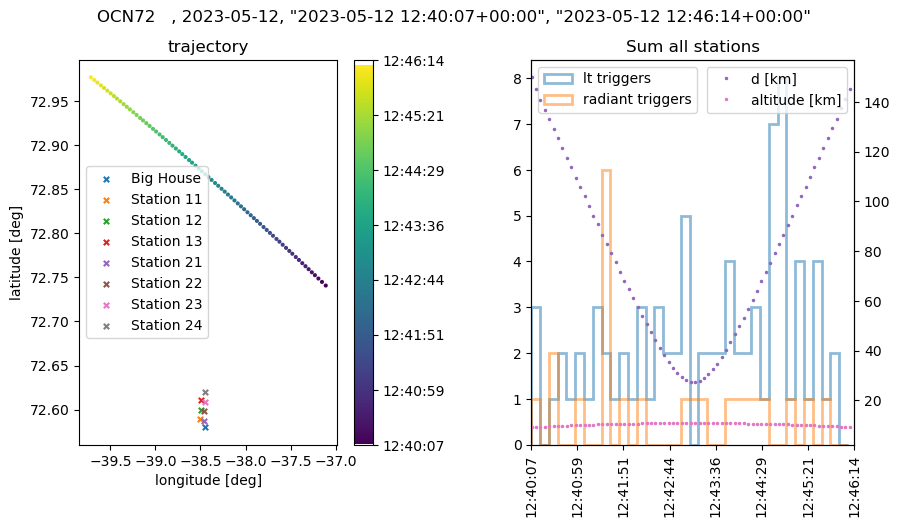

In [9]:
f1.plot_flight()


In [10]:

'''
tracker.flights_distinct = tracker.flights_distinct.query('minr2 < 30')
df = pd.DataFrame(['trigger_distances'])
for i in range(len(tracker.flights_distinct)):
    t = tracker.flights_distinct
    start_time = t.mintime.iloc[i][:19] # [:19] to throw away potential microseconds
    stop_time = t.maxtime.iloc[i][:19] # [:19] to throw away potential microseconds
    start_time = FlightTracker.utc.localize(datetime.strptime(start_time, FlightTracker.fmt))
    stop_time = FlightTracker.utc.localize(datetime.strptime(stop_time, FlightTracker.fmt))

    flightnumber = t.flightnumber.iloc[i]
    print(i, ' ', flightnumber)

    f = tracker.flights.query(f"readtime_utc >= '{datetime.strftime(start_time, FlightTracker.fmt)}' & readtime_utc <= '{datetime.strftime(stop_time, FlightTracker.fmt)}' & flightnumber == '{flightnumber}' ").copy()
    times = pd.to_datetime(f.readtime_utc, format='ISO8601').astype('int64') / 10**9
    r = np.sqrt(f.r2)

    header_df = FlightTracker.get_runtable(start_time, stop_time)

    temp_df = pd.DataFrame()
    temp_df['trigger_distances'] = FlightTracker.part_lin(header_df[(times.min() <= header_df.trigger_time) & (header_df.trigger_time <= times.max())].trigger_time, times, r)
    
    df = pd.concat([df, temp_df], ignore_index=True)



plt.hist(df.trigger_distances, bins = 50)
;
'''

'\ntracker.flights_distinct = tracker.flights_distinct.query(\'minr2 < 30\')\ndf = pd.DataFrame([\'trigger_distances\'])\nfor i in range(len(tracker.flights_distinct)):\n    t = tracker.flights_distinct\n    start_time = t.mintime.iloc[i][:19] # [:19] to throw away potential microseconds\n    stop_time = t.maxtime.iloc[i][:19] # [:19] to throw away potential microseconds\n    start_time = FlightTracker.utc.localize(datetime.strptime(start_time, FlightTracker.fmt))\n    stop_time = FlightTracker.utc.localize(datetime.strptime(stop_time, FlightTracker.fmt))\n\n    flightnumber = t.flightnumber.iloc[i]\n    print(i, \' \', flightnumber)\n\n    f = tracker.flights.query(f"readtime_utc >= \'{datetime.strftime(start_time, FlightTracker.fmt)}\' & readtime_utc <= \'{datetime.strftime(stop_time, FlightTracker.fmt)}\' & flightnumber == \'{flightnumber}\' ").copy()\n    times = pd.to_datetime(f.readtime_utc, format=\'ISO8601\').astype(\'int64\') / 10**9\n    r = np.sqrt(f.r2)\n\n    header_df = F